In [18]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

In [19]:
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')

In [20]:
spambase = pd.read_csv(data_path, delimiter=',')

In [21]:
spambase.head()

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [22]:
X = spambase.drop(['is_spam'], axis=1)
X.shape

(4601, 54)

In [23]:
y = spambase['is_spam']
y.shape

(4601,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [25]:
model = LogisticRegression(solver='lbfgs')

In [26]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_predict_train = model.predict(X_train)

In [28]:
accuracy_score(y_train, y_predict_train)

0.9340579710144927

In [29]:
y_predict_test = model.predict(X_test)

In [30]:
accuracy_score(y_test, y_predict_test)

0.9349240780911063

In [31]:
model.coef_

array([[-0.35061008, -0.11609932, -0.39932385,  0.6134138 ,  1.09840621,
         0.22411881,  2.3683641 ,  0.69071815,  0.15554438,  0.37577964,
        -0.43231504, -0.37712203, -0.7391995 ,  0.6568177 ,  0.88896131,
         1.53909519,  0.68677918, -0.3189558 ,  0.15583866,  0.74869818,
         0.60014435,  1.13326939,  0.93608936,  1.62648679, -2.70626026,
        -0.6349246 , -3.78041497,  1.52922079, -0.58778124, -0.44023911,
        -1.21947902, -0.58865884, -0.56936533,  0.42785979, -1.2993181 ,
         0.24849879, -0.98805307,  0.8564812 , -0.25457605, -0.21346142,
        -1.68529104, -1.97978242, -0.62427105, -1.29876181, -0.98372767,
        -2.2734472 ,  0.18747071, -1.40566621, -0.33408309,  0.20818975,
         0.03976749,  1.34459364,  1.84646299, -0.43176707]])

In [36]:
index_hp = [j for j in range(len(X.columns.values)) if (X.columns.values)[j] == 'word_freq_hp_binarized']

In [37]:
index_hp

[24]

In [38]:
model.coef_[0][24]

-2.7062602605407076

In [40]:
index_dollar_sign = [j for j in range(len(X.columns.values)) if (X.columns.values)[j] == 'char_freq_$_binarized']

In [41]:
index_dollar_sign

[52]

In [42]:
model.coef_[0][52]

1.8464629876323375

In [43]:
model2 = LinearSVC().fit(X_train, y_train)

In [44]:
y_pred_train = model2.predict(X_train)

In [45]:
accuracy_score(y_train, y_pred_train)

0.9338164251207729

In [46]:
y_pred_test = model2.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred_test)

0.93058568329718

In [48]:
model2.coef_[0][24]

-0.8947912615186725

In [49]:
model2.coef_[0][52]

0.6156296704730843

In [50]:
model3 = SVC().fit(X_train, y_train)

In [51]:
y_pred_train = model3.predict(X_train)

In [52]:
accuracy_score(y_train, y_pred_train)

0.9345410628019324

In [53]:
y_pred_test = model3.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred_test)

0.928416485900217

In [55]:
model4 = SVC(kernel='poly').fit(X_train, y_train)

In [56]:
y_pred_train = model4.predict(X_train)

In [57]:
accuracy_score(y_train, y_pred_train)

0.8004830917874396

In [58]:
y_pred_test = model4.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred_test)

0.8047722342733189

In [97]:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')

In [98]:
splice_train = pd.read_csv(data_path, delimiter=',', dtype=c)

In [99]:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')

In [100]:
splice_test = pd.read_csv(data_path, delimiter=',', dtype=c)

In [101]:
splice_train.head()

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,NaN
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,NaN
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N


In [102]:
splice_train.shape

(2935, 61)

In [103]:
splice_test.head()

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,NaN
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,NaN
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,NaN


In [104]:
splice_test.shape

(255, 61)

In [110]:
X_train = splice_train.drop(['class'], axis=1)
X_train.shape

(2935, 60)

In [111]:
X_train_cat = pd.get_dummies(X_train)
X_train_cat.shape

(2935, 480)

In [112]:
X_test = splice_test.drop(['class'], axis=1)

In [113]:
X_test_cat = pd.get_dummies(X_test)
X_test_cat.shape

(255, 480)

In [114]:
X_test_cat.head(10)

,pos0_A,pos0_T,pos0_G,pos0_C,pos0_D,pos0_N,pos0_S,pos0_R,pos1_A,pos1_T,...,pos58_S,pos58_R,pos59_A,pos59_T,pos59_G,pos59_C,pos59_D,pos59_N,pos59_S,pos59_R
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
labels = CategoricalDtype(['N','IE','EI'], ordered=True)

In [116]:
s = pd.Series(splice_train['class'], dtype=labels)

In [118]:
y_train = pd.get_dummies(s)

In [119]:
y_train.shape

(2935, 3)

In [120]:
type(y_train)

pandas.core.frame.DataFrame

In [121]:
y_train.head()

,N,IE,EI
0,1,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,0


In [124]:
y_test = pd.get_dummies(pd.Series(splice_test['class'], dtype=labels))

In [125]:
y_test.head()

,N,IE,EI
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [126]:
model = KNeighboursClassifier(n_neighbors=1).fit(X_train_cat, y_train)

In [128]:
y_pred_train = model.predict(X_train_cat)

In [129]:
accuracy_score(y_train, y_pred_train)

0.9996592844974447

In [130]:
y_pred_test = model.predict(X_test_cat)

In [131]:
accuracy_score(y_test, y_pred_test)

0.7647058823529411

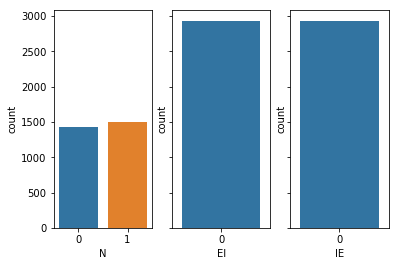

In [139]:
fig, axs = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='N', data=y_train, ax=axs[0])
sns.countplot(x='EI', data=y_train, ax=axs[1])
sns.countplot(x='IE', data=y_train, ax=axs[2])
plt.show()

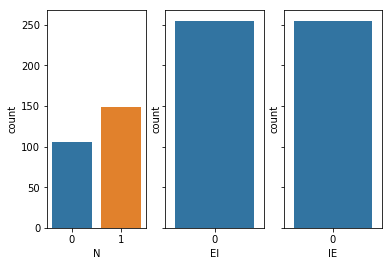

In [140]:
fig, axs = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='N', data=y_test, ax=axs[0])
sns.countplot(x='EI', data=y_test, ax=axs[1])
sns.countplot(x='IE', data=y_test, ax=axs[2])
plt.show()

In [141]:
len(y_test)

255

In [158]:
model5 = KNeighboursClassifier(n_neighbors=5).fit(X_train_cat, y_train)

In [159]:
accuracy_score(y_test, model5.predict(X_test_cat))

0.7843137254901961

In [160]:
model10 = KNeighboursClassifier(n_neighbors=10).fit(X_train_cat, y_train)

In [161]:
accuracy_score(y_test, model10.predict(X_test_cat))

0.7568627450980392

In [149]:
model50 = KNeighboursClassifier(n_neighbors=50).fit(X_train_cat, y_train)

In [162]:
accuracy_score(y_test, model50.predict(X_test_cat))

0.7647058823529411

In [163]:
model100 = KNeighboursClassifier(n_neighbors=100).fit(X_train_cat, y_train)

In [164]:
accuracy_score(y_test, model100.predict(X_test_cat))

0.7725490196078432

In [170]:
model1000 = KNeighboursClassifier(n_neighbors=1000).fit(X_train_cat, y_train)

In [171]:
accuracy_score(y_test, model1000.predict(X_test_cat))

0.7411764705882353

In [168]:
model2000 = KNeighboursClassifier(n_neighbors=2000).fit(X_train_cat, y_train)

In [169]:
accuracy_score(y_test, model2000.predict(X_test_cat))

0.7607843137254902

In [172]:
150/255

0.5882352941176471

In [177]:
models = np.array([0.0 for i in range(9)])
del models

In [178]:
Ks = np.array([5,10,50,100,200,500,1000,1500,2000])

In [179]:
scores = np.array([0.0 for i in range(9)])

In [180]:
for i in range(9):
    model = KNeighboursClassifier(n_neighbors=Ks[i]).fit(X_train_cat, y_train)
    scores[i] = accuracy_score(y_test, model.predict(X_test_cat))

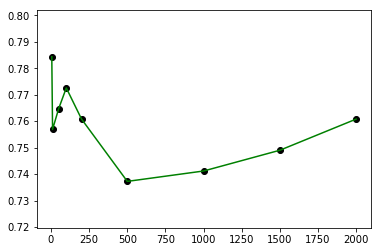

In [181]:
plt.figure()
plt.scatter(Ks, scores, color = "black")
plt.plot(Ks, scores, color = "green")
plt.show()

In [182]:
model_5 = KNeighboursClassifier(n_neighbors=5).fit(X_train_cat, y_train)

In [183]:
y_pred_5 = model_5.predict(X_test_cat)

In [187]:
type(y_test.values)

numpy.ndarray

In [193]:
y_test.head()

,N,IE,EI
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [192]:
y_test_cat = np.zeros(len(y_test))
y_test_cat.shape

(255,)

In [194]:
for i in range(len(y_test)):
    if y_test['N'][i] == 1:
        y_test_cat[i] = 1
    elif y_test['IE'][i] == 1:
        y_test_cat[i] = 2
    elif y_test['EI'][i] == 1:
        y_test_cat[i] = 3
    else:
        y_test_cat[i] = 0

In [195]:
y_test_cat[:4]

array([0., 1., 0., 1.])

In [196]:
y_pred_5_cat = np.zeros(len(y_test))

In [198]:
for i in range(len(y_pred_5)):
    if y_pred_5[i][0] == 1:
        y_pred_5_cat[i] = 1
    elif y_pred_5[i][1] == 1:
        y_pred_5_cat[i] = 2
    elif y_pred_5[i][2] == 1:
        y_pred_5_cat[i] = 3
    else:
        y_pred_5_cat[i] = 0

In [199]:
y_pred_5_cat[:4]

array([0., 1., 0., 1.])

In [212]:
cm = confusion_matrix(y_test_cat, y_pred_5_cat)
cm

array([[103,   3],
       [ 52,  97]])

In [204]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True)
    else:
        sns.heatmap(cm)
    plt.title(title)
    plt.ylabel('True label')

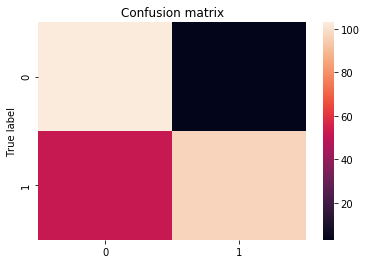

In [205]:
plot_confusion_matrix(cm)

In [213]:
200/255

0.7843137254901961

In [214]:
150/255

0.5882352941176471

In [215]:
losses = np.zeros(9)

In [216]:
for i in range(9):
    model = KNeighboursClassifier(n_neighbors=Ks[i]).fit(X_train_cat, y_train)
    losses[i] = log_loss(y_test, model.predict(X_test_cat))

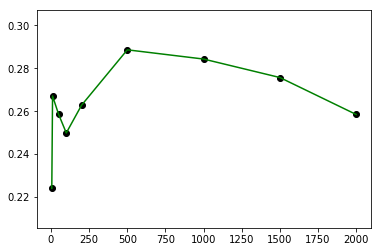

In [217]:
plt.figure()
plt.scatter(Ks, losses, color = "black")
plt.plot(Ks, losses, color = "green")
plt.show()